In [1]:
#```{r results='hide', message=FALSE, warning=FALSE}
# install all Packages required
# install.packages('ggplot2')
# Load Libraries to be used
library(ggplot2)
library(knitr)
library(dplyr)
library(tidyverse)
library(summarytools)
library(visdat)
library(igraph)
#library(treemap)
#library(dplyr)
library(devtools)
#```# Do not show warnings


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v purrr   0.3.4
v tidyr   1.1.1     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package: 'summarytools'


The following object is masked from 'package:tibble':

    view



Attaching package: 'igraph'


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked fr

In [2]:
#install.packages("readxl")
library("readxl")
# my_data <- read_excel(file.choose())

In [3]:
hotdog_df <- read_excel("Data/hotdog.xlsx", sheet="data")
head(hotdog_df)

WEEK,MSHARE,PDUB,PMAY,PBPREG,PBPALL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.54565,1.49,1.69,1.69,1.79
2,9.30145,1.49,1.99,1.89,1.99
3,5.96656,1.89,1.99,1.89,1.99
4,3.45966,1.89,1.99,1.89,1.99
5,2.76536,1.89,1.69,1.59,1.69
6,2.94224,1.89,1.99,1.89,1.99


### Seasonality

In [4]:
#tail(hotdog_df[,1]%%52)

markShare <- select(hotdog_df,WEEK,MSHARE)
markShare[,1] <- markShare[,1]%%52
#tail(markShare)

markShare1 <- markShare[1:52,]
markShare2 <- markShare[53:104,]
markShare1[52,1] <- 52
markShare2[52,1] <- 52


,WEEK
,<dbl>
108,4
109,5
110,6
111,7
112,8
113,9


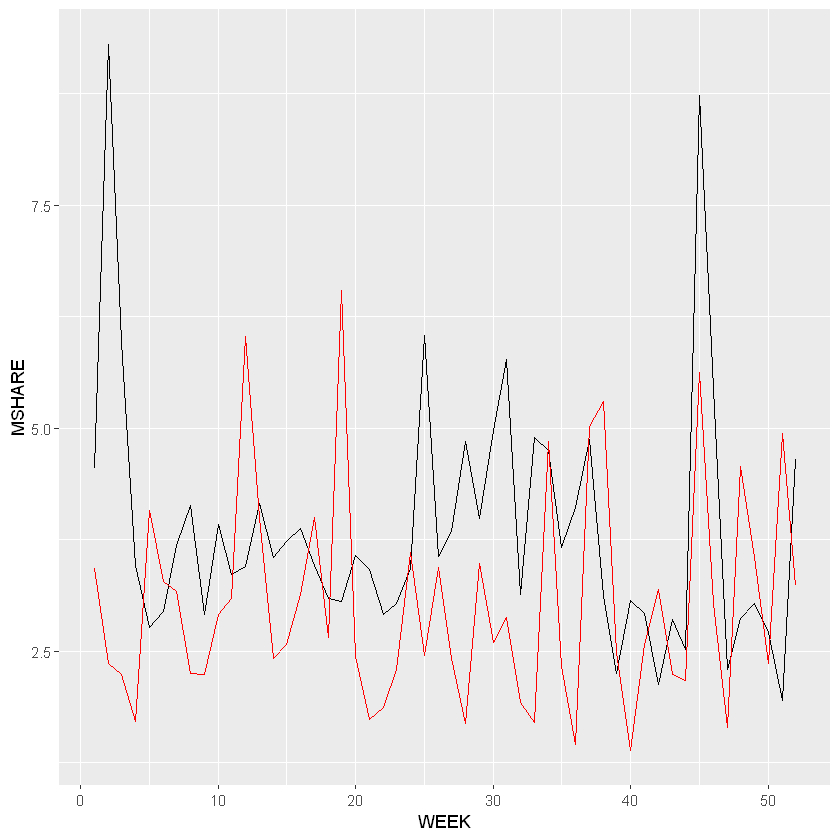

In [8]:
p1 <- ggplot(markShare1, aes(x=WEEK))
p1 <-p1 + geom_line(aes(y=MSHARE))
#p <-p + geom_line(y=markShare$MSHARE)
p2 <- geom_line(data=markShare2, aes(x=WEEK, y=MSHARE), colour = "Red")
#p2 <-p + geom_line(aes(y=MSHARE))
p <- p1 + p2
p

### Scenarios

Actual Prices:

- Duberque: $1.49

- Oscar Mayer: $1.69

- Ball Park:
    - regular: $1.79
    
    - special: $1.89

Rumor 1:
 - Ball Park decrease regular price to $1.45

Rumor 2: 
- Ballpark increase special price to $1.95

- Balpark decrease special price to $1.55

In [9]:
kable(hotdog_df %>% summarize_if(is.numeric, funs(mean,sd,max,median,min),na.rm = T) %>% gather(stat,val) %>% separate(stat,into = c("var","stat"), sep = "_") %>% spread(stat, val) %>% select(var,mean,sd,min,median,max), bookstabs =T, digits =2)


Warning message:
"`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."




|var    |  mean|    sd|  min| median|    max|
|:------|-----:|-----:|----:|------:|------:|
|MSHARE |  3.49|  1.43| 1.39|   3.14|   9.30|
|PBPALL |  1.77|  0.16| 1.49|   1.69|   1.99|
|PBPREG |  1.68|  0.15| 1.39|   1.69|   1.89|
|PDUB   |  1.67|  0.14| 1.39|   1.69|   1.89|
|PMAY   |  1.70|  0.14| 1.29|   1.69|   1.99|
|WEEK   | 57.00| 32.76| 1.00|  57.00| 113.00|

|var    |  mean|    sd|  min| median|    max|
|:------|:-----:|:-----:|:----:|:------:|------:|
|MSHARE |  3.49|  1.43| 1.39|   3.14|   9.30|
|PBPALL |  1.77|  0.16| 1.49|   1.69|   1.99|
|PBPREG |  1.68|  0.15| 1.39|   1.69|   1.89|
|PDUB   |  1.67|  0.14| 1.39|   1.69|   1.89|
|PMAY   |  1.70|  0.14| 1.29|   1.69|   1.99|
|WEEK   | 57.00| 32.76| 1.00|  57.00| 113.00|

In [10]:
round(cor(hotdog_df[,-1]),2)

,MSHARE,PDUB,PMAY,PBPREG,PBPALL
MSHARE,1.00,-0.43,0.17,0.35,0.37
PDUB,-0.43,1.00,0.48,0.36,0.32
PMAY,0.17,0.48,1.00,0.55,0.53
PBPREG,0.35,0.36,0.55,1.00,0.98
PBPALL,0.37,0.32,0.53,0.98,1.00


## Question a

Does Dubuque's price affect its market share?

In [11]:
Dub_df <- select(hotdog_df, MSHARE,PDUB)
head(Dub_df)

MSHARE,PDUB
<dbl>,<dbl>
4.54565,1.49
9.30145,1.49
5.96656,1.89
3.45966,1.89
2.76536,1.89
2.94224,1.89


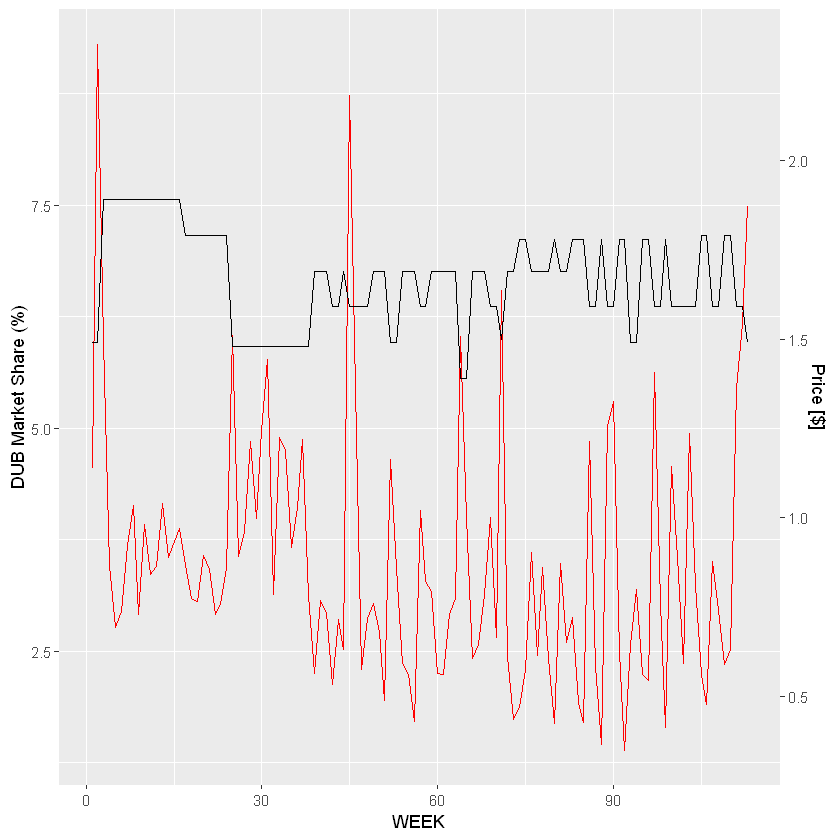

In [12]:
coeff <- 0.25
p <- ggplot(hotdog_df, aes(x=WEEK)) 
p <- p + geom_line(aes(y=MSHARE), colour="Red")
p <- p + geom_line(aes(y=PDUB/coeff), colour ="black")
p <- p + scale_y_continuous(name= "DUB Market Share (%)",sec.axis = sec_axis(~.*coeff, name = "Price [$]"))
p

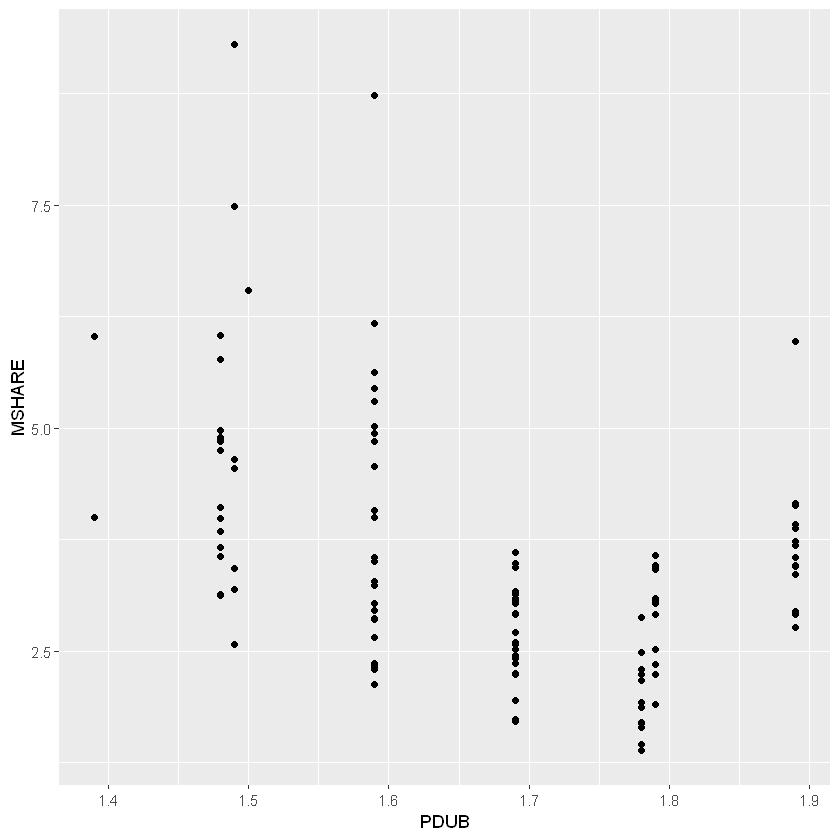

In [13]:
ggplot(Dub_df, aes(PDUB,MSHARE)) + geom_point()

### Principal Components

In [14]:
CovMat <- cov(Dub_df)
CovMat

,MSHARE,PDUB
MSHARE,2.03801223,-0.08429013
PDUB,-0.08429013,0.01859960


In [15]:
# MSHARE Contribution to variability

CovMat[1,1]/(CovMat[1,1]+ CovMat[2,2])

[1] 0.9909562

In [16]:
# PDUB Contribution to variability

CovMat[2,2]/(CovMat[1,1]+ CovMat[2,2])

[1] 0.009043809

In [17]:
CorelMat <- sqrt(CovMat[2,1]*CovMat[1,2])/ sqrt(CovMat[1,1]*CovMat[2,2])
CorelMat

[1] 0.4329338

In [18]:
correl <- cor(Dub_df)
correl

,MSHARE,PDUB
MSHARE,1.0000000,-0.4329338
PDUB,-0.4329338,1.0000000


In [19]:
two.pca <- prcomp(Dub_df,center = TRUE ,scale. = TRUE)
summary(two.pca)

Importance of components:
                          PC1    PC2
Standard deviation     1.1971 0.7530
Proportion of Variance 0.7165 0.2835
Cumulative Proportion  0.7165 1.0000

In [20]:
two.pca

Standard deviations (1, .., p=2):
[1] 1.197052 0.753038

Rotation (n x k) = (2 x 2):
              PC1        PC2
MSHARE -0.7071068 -0.7071068
PDUB    0.7071068 -0.7071068

In [21]:
pc1 <- two.pca$x[,1]
pc2 <- two.pca$x[,2]


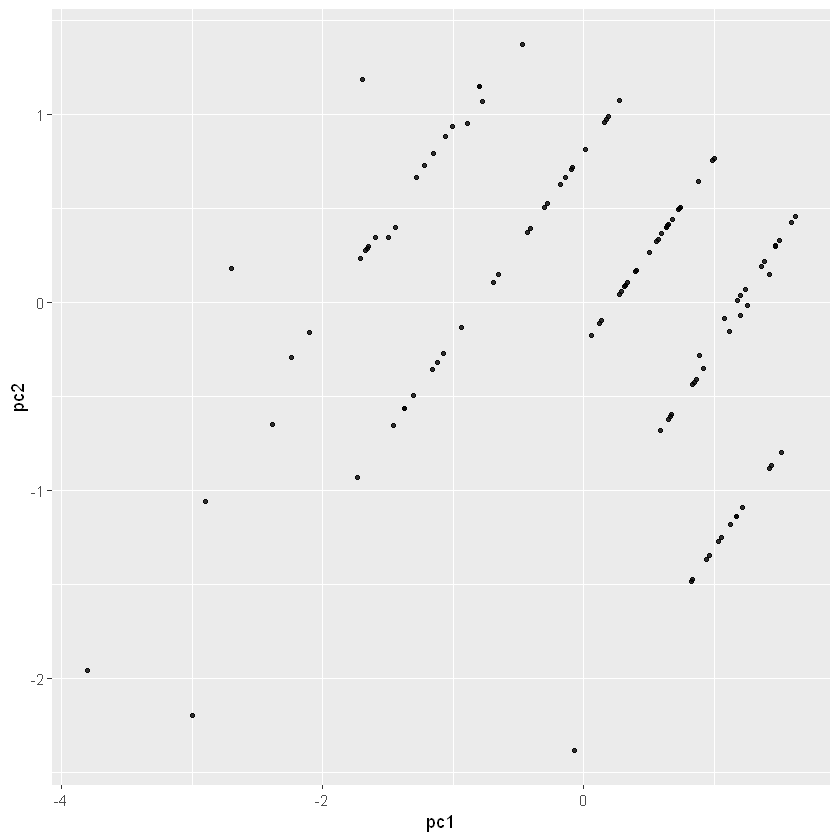

In [22]:
ggplot(data.frame(pc1,pc2), aes(pc1,pc2)) + geom_point(size=1, alpha=0.8)

### Question b

Does Oscar Mayer's price affect Dubuque's market share? If so, how?

In [23]:
Mayer_df <- select(hotdog_df, MSHARE, PMAY)
head(Mayer_df)

MSHARE,PMAY
<dbl>,<dbl>
4.54565,1.69
9.30145,1.99
5.96656,1.99
3.45966,1.99
2.76536,1.69
2.94224,1.99


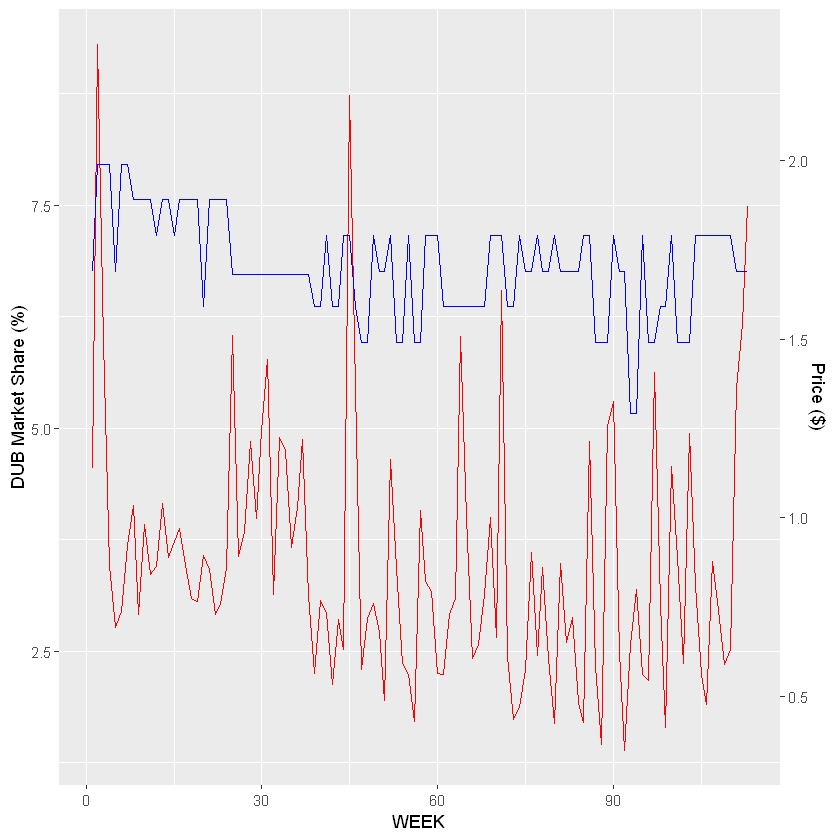

In [24]:
coeff <- 0.25
p <- ggplot(hotdog_df, aes(x=WEEK)) 
p <- p + geom_line(aes(y=MSHARE), colour="Red")
p <- p + geom_line(aes(y=PMAY/coeff), colour ="blue")
p <- p + scale_y_continuous(name= "DUB Market Share (%)",sec.axis = sec_axis(~.*coeff, name = "Price ($)"))
#p <- p + theme_ipsum()
p

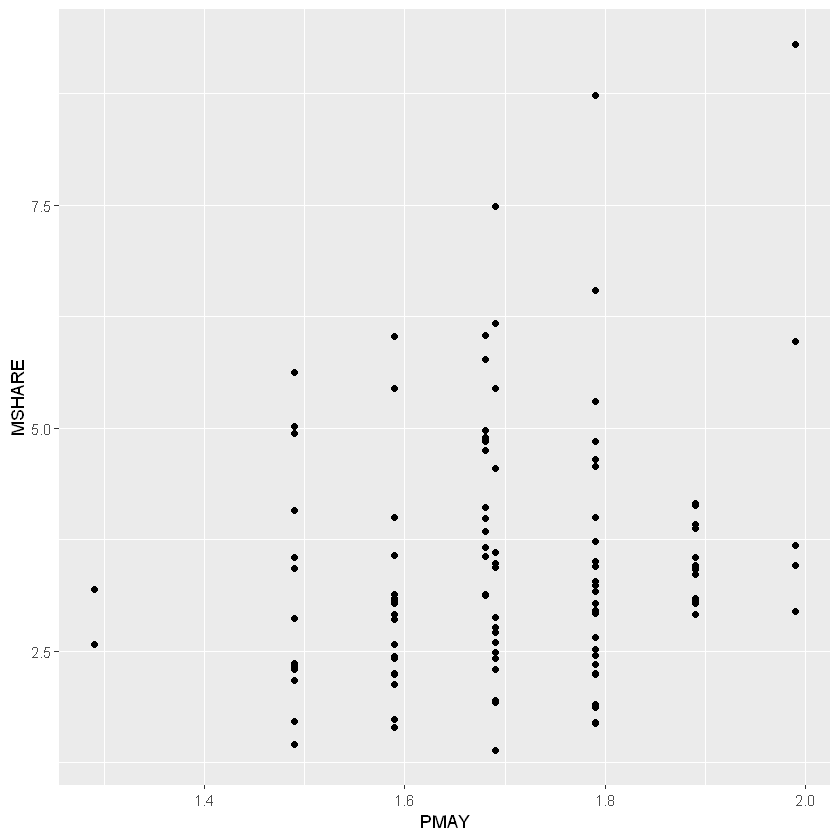

In [25]:
ggplot(Mayer_df,aes(PMAY,MSHARE)) + geom_point()

In [26]:
CovMat <- cov(Mayer_df)
CovMat

,MSHARE,PMAY
MSHARE,2.03801223,0.03495809
PMAY,0.03495809,0.02086620


In [27]:
# MSHARE Contribution to variability

CovMat[1,1]/(CovMat[1,1]+ CovMat[2,2])

[1] 0.9898653

In [28]:
CovMat[2,2]/(CovMat[1,1]+ CovMat[2,2])

[1] 0.01013474

In [29]:
CorelMat <- sqrt(CovMat[2,1]*CovMat[1,2])/ sqrt(CovMat[1,1]*CovMat[2,2])
CorelMat

[1] 0.1695207

In [30]:
correl <- cor(Mayer_df)
correl

,MSHARE,PMAY
MSHARE,1.0000000,0.1695207
PMAY,0.1695207,1.0000000


In [31]:
two.pca <- prcomp(Mayer_df,center = TRUE ,scale. = TRUE)
summary(two.pca)

Importance of components:
                          PC1    PC2
Standard deviation     1.0814 0.9113
Proportion of Variance 0.5848 0.4152
Cumulative Proportion  0.5848 1.0000

In [32]:
two.pca

Standard deviations (1, .., p=2):
[1] 1.0814438 0.9113064

Rotation (n x k) = (2 x 2):
              PC1        PC2
MSHARE -0.7071068  0.7071068
PMAY   -0.7071068 -0.7071068

In [33]:
pc1 <- two.pca$x[,1]
pc2 <- two.pca$x[,2]


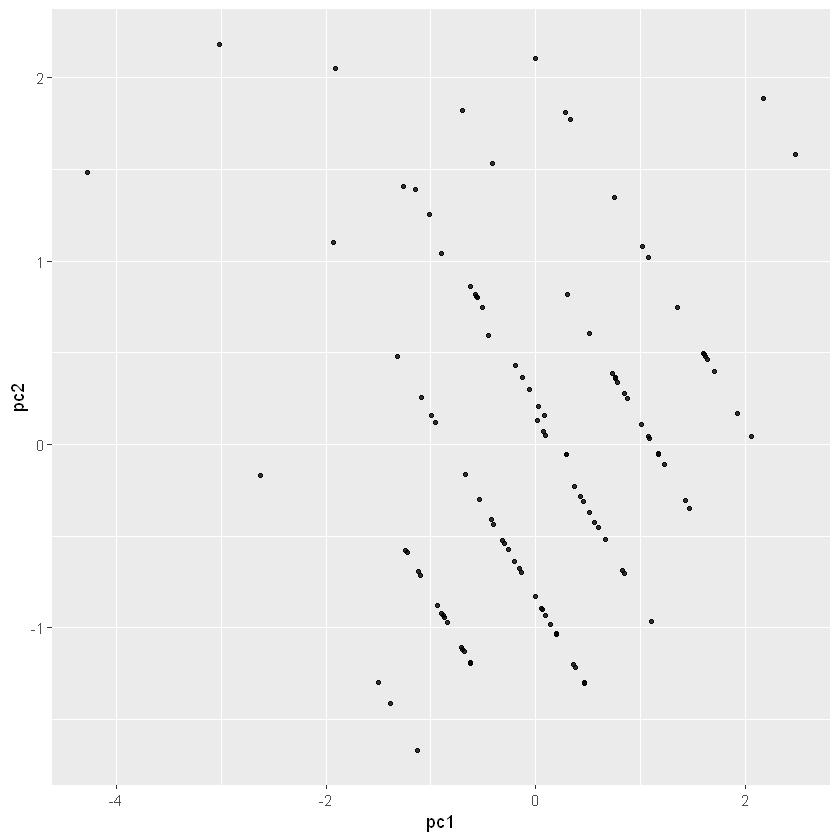

In [34]:
ggplot(data.frame(pc1,pc2), aes(pc1,pc2)) + geom_point(size=1, alpha=0.8)

### Question C

Do Ball Park's prices affect Duberque's market share? If so, how?

In [35]:
Ball_df <- select(hotdog_df, MSHARE, PBPREG,PBPALL)
head(Ball_df)

MSHARE,PBPREG,PBPALL
<dbl>,<dbl>,<dbl>
4.54565,1.69,1.79
9.30145,1.89,1.99
5.96656,1.89,1.99
3.45966,1.89,1.99
2.76536,1.59,1.69
2.94224,1.89,1.99


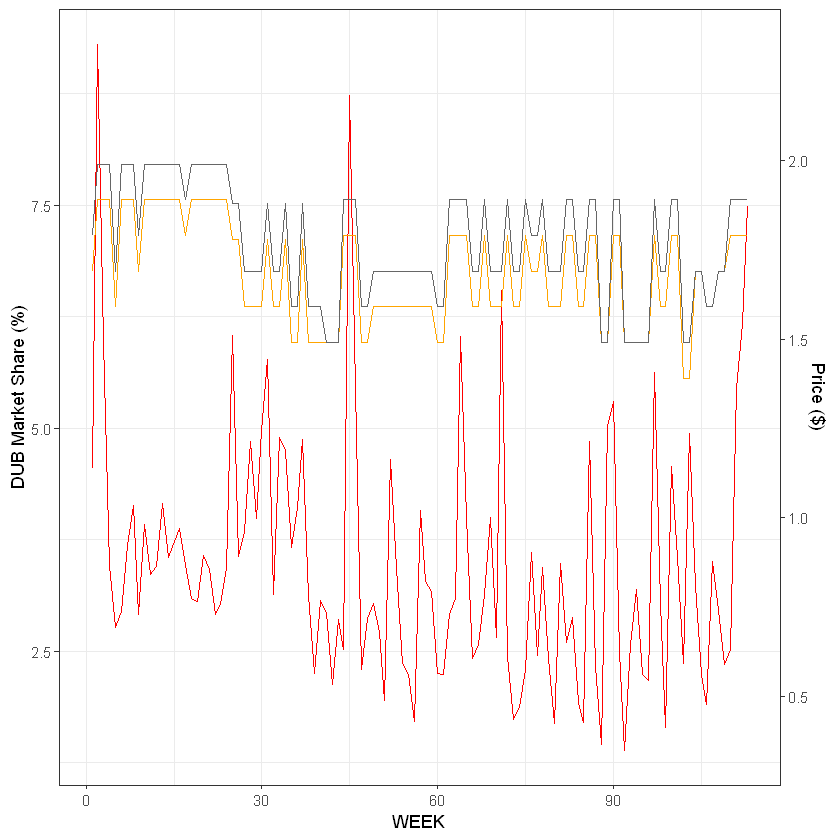

In [36]:
coeff <- 0.25
p <- ggplot(hotdog_df, aes(x=WEEK)) 
p <- p + geom_line(aes(y=MSHARE), colour="Red")
p <- p + geom_line(aes(y=PBPREG/coeff), colour ="orange")
p <- p + geom_line(aes(y=PBPALL/coeff), colour ="grey40")
p <- p + scale_y_continuous(name= "DUB Market Share (%)",sec.axis = sec_axis(~.*coeff, name = "Price ($)"))
p <- p + theme_bw()
p <- p + theme(legend.position = "top")
p

In [37]:
round(cov(Ball_df),2)

,MSHARE,PBPREG,PBPALL
MSHARE,2.04,0.07,0.09
PBPREG,0.07,0.02,0.02
PBPALL,0.09,0.02,0.03


In [38]:
Ball_df_sd <- as.tibble(scale(Ball_df))
head(round(Ball_df_sd,2))

Warning message:
"`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


MSHARE,PBPREG,PBPALL
<dbl>,<dbl>,<dbl>
0.74,0.05,0.13
4.07,1.43,1.37
1.74,1.43,1.37
-0.02,1.43,1.37
-0.51,-0.64,-0.49
-0.38,1.43,1.37


In [39]:
round(cov(Ball_df_sd),2)

,MSHARE,PBPREG,PBPALL
MSHARE,1.00,0.35,0.37
PBPREG,0.35,1.00,0.98
PBPALL,0.37,0.98,1.00


In [40]:
ball.pca <- prcomp(Ball_df_sd, center = TRUE, scale. =TRUE)

In [41]:
summary(ball.pca)

Importance of components:
                          PC1    PC2     PC3
Standard deviation     1.4821 0.8848 0.14294
Proportion of Variance 0.7322 0.2610 0.00681
Cumulative Proportion  0.7322 0.9932 1.00000

Eigenvectors (weights of each variable in each PC)

In [42]:
ball.pca$rotation

,PC1,PC2,PC3
MSHARE,-0.3920504,-0.9198246,-0.01480658
PBPREG,-0.6488990,0.2879129,-0.70429840
PBPALL,-0.6520940,0.2665125,0.70974962


PC1 = -0,39*MSHARE - 0.649 * PBREG - 0.652 * PBPALL

PC2 = -0.92*MSHARE + 0.288 * PBREG + 0.266 * PBPALL

PC3 = -0.015*MSHARE + 0.704 * PBREG + 0.709 * PBPALL

In [43]:
ball.pca$rotation**2

,PC1,PC2,PC3
MSHARE,0.1537035,0.84607723,0.0002192347
PBPREG,0.4210699,0.08289385,0.4960362416
PBPALL,0.4252266,0.07102892,0.5037445238


In [44]:
colSums(ball.pca$rotation**2)

PC1 PC2 PC3 
  1   1   1

In [45]:
round(head(ball.pca$x,5),2)

PC1,PC2,PC3
-0.41,-0.63,0.05
-3.42,-2.97,-0.09
-2.50,-0.82,-0.06
-1.82,0.79,-0.03
0.93,0.15,0.11


In [46]:
sd(ball.pca$x[,1])

[1] 1.482133

In [47]:
var(ball.pca$x[,1])

[1] 2.196719

## Question d

Is Ball Park or Oscar Mayer the leading competitor?

|var    |  mean|    sd|  min| median|    max|
|:------|:-----:|:-----:|:----:|:------:|------:|
|MSHARE |  3.49|  1.43| 1.39|   3.14|   9.30|
|PBPALL |  1.77|  0.16| 1.49|   1.69|   1.99|
|PBPREG |  1.68|  0.15| 1.39|   1.69|   1.89|
|PDUB   |  1.67|  0.14| 1.39|   1.69|   1.89|
|PMAY   |  1.70|  0.14| 1.29|   1.69|   1.99|
|WEEK   | 57.00| 32.76| 1.00|  57.00| 113.00|

In [48]:
round(cov(hotdog_df[,-1]),2) # Covariance without considering Weeks

,MSHARE,PDUB,PMAY,PBPREG,PBPALL
MSHARE,2.04,-0.08,0.03,0.07,0.09
PDUB,-0.08,0.02,0.01,0.01,0.01
PMAY,0.03,0.01,0.02,0.01,0.01
PBPREG,0.07,0.01,0.01,0.02,0.02
PBPALL,0.09,0.01,0.01,0.02,0.03


In [49]:
hotdog_df_sd <- as.tibble(scale(hotdog_df[,-1]))
head(round(hotdog_df_sd,2))

MSHARE,PDUB,PMAY,PBPREG,PBPALL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.74,-1.30,-0.10,0.05,0.13
4.07,-1.30,1.98,1.43,1.37
1.74,1.63,1.98,1.43,1.37
-0.02,1.63,1.98,1.43,1.37
-0.51,1.63,-0.10,-0.64,-0.49
-0.38,1.63,1.98,1.43,1.37


In [50]:
round(cov(hotdog_df_sd),2)

,MSHARE,PDUB,PMAY,PBPREG,PBPALL
MSHARE,1.00,-0.43,0.17,0.35,0.37
PDUB,-0.43,1.00,0.48,0.36,0.32
PMAY,0.17,0.48,1.00,0.55,0.53
PBPREG,0.35,0.36,0.55,1.00,0.98
PBPALL,0.37,0.32,0.53,0.98,1.00


In [51]:
#round(cor(hotdog_df_sd),2)

In [52]:
hotdog.pca <- prcomp(hotdog_df_sd, center = TRUE, scale. =TRUE)
summary(hotdog.pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5
Standard deviation     1.6522 1.2142 0.7417 0.47549 0.14070
Proportion of Variance 0.5459 0.2949 0.1100 0.04522 0.00396
Cumulative Proportion  0.5459 0.8408 0.9508 0.99604 1.00000

In [53]:
hotdog.pca$rotation

,PC1,PC2,PC3,PC4,PC5
MSHARE,-0.2075416,-0.71485633,0.295083459,0.5989647,-0.0085978744
PDUB,-0.3026070,0.66071213,-0.005710873,0.6860021,-0.0354535285
PMAY,-0.4623343,0.16447063,0.795379418,-0.3557634,-0.0006616738
PBPREG,-0.5734463,-0.09829234,-0.368064060,-0.1244245,0.7145245260
PBPALL,-0.5681213,-0.12541102,-0.380517499,-0.1690955,-0.6986582769


In [54]:
colSums(hotdog.pca$rotation**2)

PC1 PC2 PC3 PC4 PC5 
  1   1   1   1   1

In [55]:
#install.packages("devtools")
#library(devtools)
#install_github("vqv/ggbiplot")
#library(rtools)

In [56]:
sd(hotdog.pca$x[,1])

[1] 1.652167

In [57]:
var(hotdog.pca$x[,1])

[1] 2.729655

## Question e

If Dubuque does not respond to Ball Park's campaign, how much market share is expected to be lost?

In [58]:
# reg2
mod2 <- lm(MSHARE ~ PDUB+PMAY+PBPREG+PBPALL, data=hotdog_df)
summary(mod2)


Call:
lm(formula = MSHARE ~ PDUB + PMAY + PBPREG + PBPALL, data = hotdog_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7885 -0.5982 -0.2072  0.4110  3.9366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0303     1.4123   2.854  0.00518 ** 
PDUB         -7.5977     0.8092  -9.390 1.14e-15 ***
PMAY          2.6223     0.8427   3.112  0.00238 ** 
PBPREG        3.4727     3.3161   1.047  0.29734    
PBPALL        1.0249     2.9376   0.349  0.72784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.001 on 108 degrees of freedom
Multiple R-squared:  0.5263,	Adjusted R-squared:  0.5088 
F-statistic:    30 on 4 and 108 DF,  p-value: < 2.2e-16


In [59]:
# reg3
mod3 <- lm(MSHARE ~ PDUB+PMAY+PBPREG, data=hotdog_df)
summary(mod3)


Call:
lm(formula = MSHARE ~ PDUB + PMAY + PBPREG, data = hotdog_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7958 -0.5826 -0.1982  0.4266  3.9360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0070     1.4050   2.852  0.00520 ** 
PDUB         -7.6424     0.7957  -9.604 3.42e-16 ***
PMAY          2.6333     0.8387   3.140  0.00218 ** 
PBPREG        4.5968     0.7817   5.880 4.55e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9965 on 109 degrees of freedom
Multiple R-squared:  0.5258,	Adjusted R-squared:  0.5127 
F-statistic: 40.29 on 3 and 109 DF,  p-value: < 2.2e-16


In [61]:
# reg4
mod4 <- lm(MSHARE ~ PDUB+PBPREG, data=hotdog_df)
summary(mod4)


Call:
lm(formula = MSHARE ~ PDUB + PBPREG, data = hotdog_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2921 -0.6074 -0.2003  0.5403  4.1108 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0665     1.4177   3.574 0.000524 ***
PDUB         -6.7224     0.7690  -8.741 2.95e-14 ***
PBPREG        5.7234     0.7219   7.928 1.98e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.036 on 110 degrees of freedom
Multiple R-squared:  0.4829,	Adjusted R-squared:  0.4735 
F-statistic: 51.36 on 2 and 110 DF,  p-value: < 2.2e-16


In [63]:
cor(hotdog_df[,-1])

,MSHARE,PDUB,PMAY,PBPREG,PBPALL
MSHARE,1.0000000,-0.4329338,0.1695207,0.3517390,0.3694729
PDUB,-0.4329338,1.0000000,0.4844281,0.3592837,0.3225713
PMAY,0.1695207,0.4844281,1.0000000,0.5488088,0.5336752
PBPREG,0.3517390,0.3592837,0.5488088,1.0000000,0.9793837
PBPALL,0.3694729,0.3225713,0.5336752,0.9793837,1.0000000


In [ ]:

# Predict values based on model and calculate Residuals

#d$pred <- predict(mod, data = d)
#d$resid <- d$price - d$pred
#d

# Calculate quantiles of Residuals
#stats::quantile(d$resid)

#hist(d$resid, xlab = "Residuals", main = "")
# Show mean
#paste(c("Error mean", mean(d$resid)))